## City weather condition: Openweathermap API and Citipy

In [69]:
import pandas as pd
import numpy as np
import csv
import os
import random
import time
import requests as rq
from citipy import citipy
import openweathermapy.core as ow
import matplotlib.pyplot as plt
import seaborn as sns

os.system('touch weather500.csv')

api_key = '76e147c91ea53be5e87ab63c2580c3ea'
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# Building dataframe structure

columns = ['lat','lon','City','Country','Temp (F)','Humidity','Cloudiness','Wind_Speed','Latitude','Longitude']
index = np.arange(2000)
coor_df = pd.DataFrame(columns=columns, index=index)

# Randomly generating unique latitide and longtitude coordinates.

seen = set()

for index, row in coor_df.iterrows():
    x,y = random.randint(-90, 90),random.randint(-180, 180)
    while len(seen) < 500:
        while (x, y) in seen:
            x,y = random.randint(-90, 90),random.randint(-180, 180)
        seen.add((x, y))
    coor_df.loc[index,'lat'] = x
    coor_df.loc[index,'lon'] = y


In [61]:
coor_df

,lat,lon,City,Country,Temp (F),Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,-83,-82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-44,-160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-49,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-79,-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-20,-146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-56,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,42,-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,-176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-45,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
for index, row in coor_df.iterrows():
    city = citipy.nearest_city(coor_df.loc[index,'lat'],coor_df.loc[index,'lon'])
    coor_df.loc[index,'City'] = city.city_name
    coor_df.loc[index,'Country'] = city.country_code
    
#     weather_api = query_url + coor_df.loc[index,'City'] + ',' + coor_df.loc[index,'Country']
#     weather_data = rq.get(weather_api).json()
#     api_log.append({'URL':weather_api})
    
#     temp_data = weather_data['main']['temp']
#     humid_data = weather_data['main']['humidity']
#     cloud_data = weather_data['clouds']['all']
#     wind_data = weather_data['wind']['speed']
#     lat_data = weather_data['coord']['lat']
#     lon_data = weather_data['coord']['lon']
    
#     coor_df.set_value(index,'Temp (F)',temp_Data)
#     coor_df.set_value(index,'Humidity', humid_data)
#     coor_df.set_value(index,'Cloudiness', cloud_data)
#     coor_df.set_value(index,'Wind_Speed', wind_data)
#     coor_df.set_value(index,'Latitude', lat_data)
#     coor_df.set_value(index,'Longitude', lon_data)
    
#     time.sleep(10)

In [63]:
coor_df

,lat,lon,City,Country,Temp (F),Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,-83,-82,ushuaia,ar,NaN,NaN,NaN,NaN,NaN,NaN
1,-44,-160,avarua,ck,NaN,NaN,NaN,NaN,NaN,NaN
2,-49,86,busselton,au,NaN,NaN,NaN,NaN,NaN,NaN
3,-79,-149,mataura,pf,NaN,NaN,NaN,NaN,NaN,NaN
4,8,120,simbahan,ph,NaN,NaN,NaN,NaN,NaN,NaN
5,-20,-146,tautira,pf,NaN,NaN,NaN,NaN,NaN,NaN
6,-56,-131,rikitea,pf,NaN,NaN,NaN,NaN,NaN,NaN
7,42,-89,rochelle,us,NaN,NaN,NaN,NaN,NaN,NaN
8,9,-176,kapaa,us,NaN,NaN,NaN,NaN,NaN,NaN
9,-45,141,burnie,au,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
citydf = coor_df.drop_duplicates(subset='City')
citydf

,lat,lon,City,Country,Temp (F),Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,-83,-82,ushuaia,ar,NaN,NaN,NaN,NaN,NaN,NaN
1,-44,-160,avarua,ck,NaN,NaN,NaN,NaN,NaN,NaN
2,-49,86,busselton,au,NaN,NaN,NaN,NaN,NaN,NaN
3,-79,-149,mataura,pf,NaN,NaN,NaN,NaN,NaN,NaN
4,8,120,simbahan,ph,NaN,NaN,NaN,NaN,NaN,NaN
5,-20,-146,tautira,pf,NaN,NaN,NaN,NaN,NaN,NaN
6,-56,-131,rikitea,pf,NaN,NaN,NaN,NaN,NaN,NaN
7,42,-89,rochelle,us,NaN,NaN,NaN,NaN,NaN,NaN
8,9,-176,kapaa,us,NaN,NaN,NaN,NaN,NaN,NaN
9,-45,141,burnie,au,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
api_log = []

for index, row in citydf.iterrows(): 
    weather_api = query_url + citydf.loc[index,'City'] 
    weather_data = rq.get(weather_api).json()
    api_log.append({'URL for City': weather_api})
    
    temp_data = weather_data['main']['temp']
    humid_data = weather_data['main']['humidity']
    cloud_data = weather_data['clouds']['all']
    wind_data = weather_data['wind']['speed']
    lat_data = weather_data['coord']['lat']
    lon_data = weather_data['coord']['lon']
    
    citydf.set_value(index,'Temp (F)',temp_data)
    citydf.set_value(index,'Humidity', humid_data)
    citydf.set_value(index,'Cloudiness', cloud_data)
    citydf.set_value(index,'Wind_Speed', wind_data)
    citydf.set_value(index,'Latitude', lat_data)
    citydf.set_value(index,'Longitude', lon_data)
    
    time.sleep(5)


KeyError: 'main'

In [66]:
citydf

,lat,lon,City,Country,Temp (F),Humidity,Cloudiness,Wind_Speed,Latitude,Longitude
0,-83,-82,ushuaia,ar,41,44,75,11.41,-54.8,-68.3
1,-44,-160,avarua,ck,69.8,68,75,4.7,-21.21,-159.78
2,-49,86,busselton,au,64.31,88,0,9.22,-33.65,115.33
3,-79,-149,mataura,pf,95,50,40,9.17,27.5,77.68
4,8,120,simbahan,ph,85.73,98,20,2.73,6.3,120.58
5,-20,-146,tautira,pf,77,73,20,1.12,-17.73,-149.15
6,-56,-131,rikitea,pf,71.51,100,92,6.2,-23.12,-134.97
7,42,-89,rochelle,us,52.05,93,1,3.36,41.92,-89.07
8,9,-176,kapaa,us,79.61,74,75,13.87,22.08,-159.32
9,-45,141,burnie,au,53.33,98,8,19.06,-41.07,145.92


In [67]:
api_log

[{'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=ushuaia'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=avarua'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=busselton'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=mataura'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=simbahan'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=tautira'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=rikitea'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?a

In [ ]:
citydf.to_csv('weather500.csv')

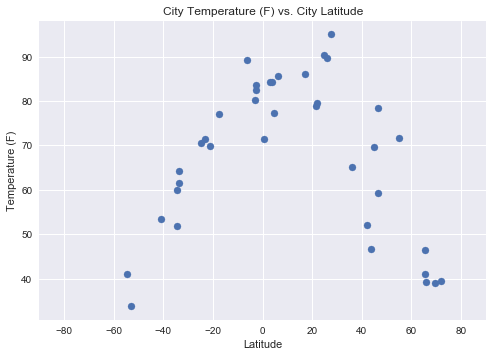

In [70]:
# Scatter plot for Temp vs Latitude
plt.scatter(citydf['Latitude'],citydf['Temp (F)'])
plt.title('City Temperature (F) vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim([-90,90])
# plt.ylim([-180,180])

plt.savefig('Temp vs Lat.png')

plt.show()

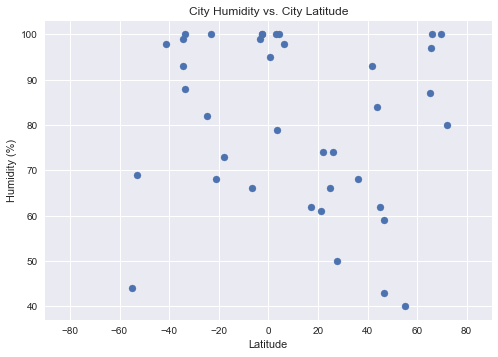

In [74]:
# Scatter plot for Humidity vs Latitude
plt.scatter(citydf['Latitude'],citydf['Humidity'])
plt.title('City Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim([-90,90])
# plt.ylim([-180,180])

plt.savefig('Humidity vs Lat.png')

plt.show()

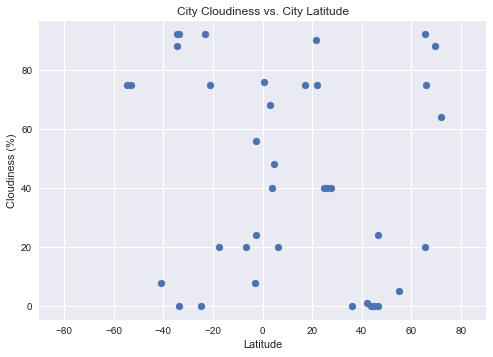

In [75]:
# Scatter plot for Cloudiness vs Latitude
plt.scatter(citydf['Latitude'],citydf['Cloudiness'])
plt.title('City Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim([-90,90])
# plt.ylim([-180,180])

plt.savefig('Cloudiness vs Lat.png')

plt.show()

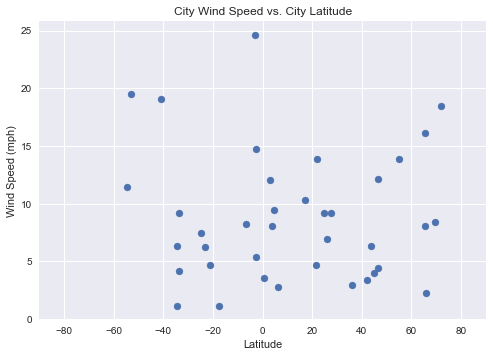

In [76]:
# Scatter plot for Wind speed vs Latitude
plt.scatter(citydf['Latitude'],citydf['Wind_Speed'])
plt.title('City Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim([-90,90])
# plt.ylim([-180,180])

plt.savefig('Wind Speed vs Lat.png')

plt.show()